In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binned_statistic_2d
from numba import njit
import h5py as h5
import os

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [3]:
sn = arepo.Snapshot(basepath + 'runs/MW3_MHG0.25_GSE2/lvl4/output', 0, combineFiles=True)

In [8]:
dir(sn.part0)

['Acceleration',
 'CoolingHeatingEnergy',
 'Coordinates',
 'Density',
 'ElectronAbundance',
 'GFM_CoolingRate',
 'GFM_Metallicity',
 'GFM_Metals',
 'GasRadCoolShutoffTime',
 'InternalEnergy',
 'Masses',
 'MolecularHFrac',
 'NeutralHydrogenAbundance',
 'ParticleIDs',
 'Potential',
 'Pressure',
 'Softenings',
 'StarFormationRate',
 'Velocities',
 'VirialParameter',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_num',
 '_parent',
 'acce',
 'cohe',
 'data',
 'gcol',
 'gmet',
 'gz',
 'hmol',
 'id',
 'mass',
 'ne',
 'nh',
 'pos',
 'pot',
 'pres',
 'rfcg',
 'rho',
 'sfr',
 'soft',
 'u',
 'vel']

In [29]:
UnitLength = sn.parameters.UnitLength_in_cm
UnitMass = sn.parameters.UnitMass_in_g
UnitVelocity = sn.parameters.UnitVelocity_in_cm_per_s

UnitTime = UnitLength / UnitVelocity
UnitEnergy = UnitMass * UnitVelocity**2

HYDROGEN_MASSFRAC = 0.76
GAMMA = 5./3.
PROTONMASS = 1.67262178e-24
BOLTZMANN = 1.38065e-16

InternalEnergy = sn.part0.InternalEnergy.value
ElectronAbundance = sn.part0.ElectronAbundance

mu = 4 * PROTONMASS / (1 + 3 * HYDROGEN_MASSFRAC + 4 * HYDROGEN_MASSFRAC * ElectronAbundance)
T = (GAMMA - 1.) * (InternalEnergy / BOLTZMANN) * (UnitEnergy / UnitMass) * mu

[4.8916097 4.9006085 4.9062085 ... 5.0404153 5.039175  5.0431137]
4.0050564
6.798379
(array([], dtype=int64),)


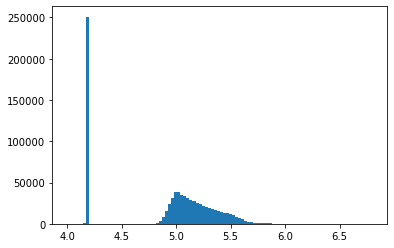

In [33]:
# plt.close()
plt.hist(np.log10(T), bins=100);
# plt.hist(np.random.rand(1000))

In [34]:
t = h5.File('MW3_MHG0.25_GSE6_kick-lvl4/MC_Prop_208.h5', mode='r')

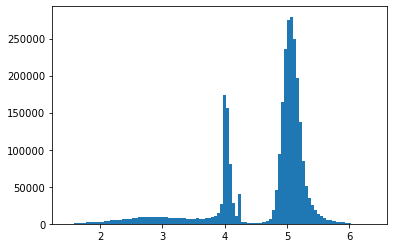

In [41]:
ptype = t['PartType5/PartType'][:]
plt.hist(np.log10(t['PartType5/Temperature'][ptype == 0]), bins=100);